In [8]:
import pandas as pd 
import numpy as  np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [29]:
data = pd.read_csv('result/res_data_all.csv' , index_col=0)
display(data.head(2))
info_cols = ['true_class' , 'src_n' , 'src_id' , 'th_class' , 'is_ok' , 'truth' , 'pred_class' , 'pred_prob' , 'clf_type']
data_val = data.drop(columns=info_cols)
data_info = data[info_cols]
#display(data_val.head(2))
#display(data_info.head(2))

,src_id,src_n,true_class,pred_class,pred_prob,th_class,is_ok,truth,clf_type,photflux_aper_u,...,hard_hm_hilim,flux_aper_lolim_m,flux_aper_lolim,hard_hm,hard_ms,bb_nh,powlaw_ampl_hilim,powlaw_ampl,powlaw_gamma_hilim,flux_aper_lolim_b
index,,,,,,,,,,,,,,,,,,,,,
0,NS0078,1WGA J1911.2+0035,NS,NS,0.996667,NS,1,1,train,0.471649,...,0.229021,0.872295,0.863954,0.241245,0.459376,0.028171,0.048141,0.006328,0.577559,0.848359
1,NS0044,XMMU J004245.2+41172,NS,NS,0.990000,NS,1,1,train,0.561798,...,0.531469,0.650252,0.698999,0.430008,0.455023,0.961874,0.111069,1.039073,0.390612,0.659174


In [30]:
from sklearn.decomposition import PCA

In [41]:
pca =  PCA(n_components=20, copy=True , whiten=True)
pca.fit(data_val)
red_data = pca.transform(data_val)
red_data = np.asarray(red_data)
red_data = pd.DataFrame(red_data , columns=np.arange(red_data.shape[1])).reset_index(drop=True) 
display(red_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.398222,1.202737,-0.345001,0.609346,0.286454,-0.650812,-2.006436,-0.595712,-0.085967,0.281120,-0.462838,-0.365217,-0.872324,-0.220513,-0.033668,-0.639309,-0.404203,1.214277,-0.295101,-1.014728
1,0.401320,-0.547095,-0.929115,0.879747,-0.778700,-0.450330,0.900319,-0.531197,-0.209566,-0.201990,-0.555754,0.043703,0.591169,0.083947,0.496368,-0.526971,-0.023704,0.322269,-0.284223,-0.086775
2,-0.518016,0.702872,1.733873,-0.308654,-0.506935,0.423086,0.013393,-0.908638,-2.201002,0.166869,-2.775112,1.481621,0.181425,1.506405,-0.668393,-0.761286,0.170344,0.157391,0.799803,-0.198121
3,-0.749415,-0.707515,-1.168326,-1.740071,0.102459,-0.053580,-0.375745,-0.448317,0.887280,2.335437,-0.874760,1.206014,-0.909407,-1.488380,-0.368463,-0.823113,-0.178294,-0.017347,-1.332991,0.180371
4,0.309290,-0.017504,-1.545110,0.362710,-1.521491,-1.167568,-1.549094,-1.366745,-0.412933,0.026681,-0.180289,-0.116593,0.680492,-0.344180,1.059045,-0.162690,0.335868,0.621216,0.889130,-0.068023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-0.703957,-0.928004,-1.095685,-1.245064,0.470056,-1.154565,-0.404616,-1.338100,-0.427600,0.128340,1.212994,1.746588,0.229222,1.102815,-0.366887,0.355830,-0.276651,-0.056994,-0.543480,-1.667775
456,-0.531767,-1.185286,-1.061728,0.138671,0.861820,1.332190,0.936844,0.224482,-0.119428,-0.947248,-0.196002,-1.033470,-0.560960,-1.046336,-0.446662,0.501263,0.316357,-0.062843,-1.296913,0.112272
457,0.317532,-0.370213,-1.334393,0.805766,-0.973635,-0.359548,-0.489119,-0.776453,-0.235615,0.023093,-0.144038,0.574191,0.713474,0.126163,0.147157,-0.214414,0.104921,-0.041487,-0.791717,-0.179645
458,0.409780,-0.880418,0.937164,-0.102295,-0.430194,-1.307731,-0.176947,-0.460871,0.133168,0.215110,0.318959,-0.540624,0.249747,0.318414,0.467892,0.202148,-0.125192,0.476376,0.339051,-0.781401


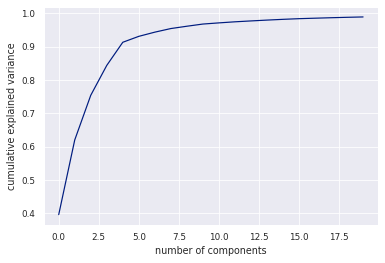

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [37]:
data_info = data_info.reset_index(drop=True) 
display(data_info.head(2))

,true_class,src_n,src_id,th_class,is_ok,truth,pred_class,pred_prob,clf_type
0,NS,1WGA J1911.2+0035,NS0078,NS,1,1,NS,0.996667,train
1,NS,XMMU J004245.2+41172,NS0044,NS,1,1,NS,0.990000,train


In [38]:
pca_data = pd.concat([data_info , red_data] , axis=1)
display(pca_data.head(2))

,true_class,src_n,src_id,th_class,is_ok,truth,pred_class,pred_prob,clf_type,0,1,2,3,4,5,6
0,NS,1WGA J1911.2+0035,NS0078,NS,1,1,NS,0.996667,train,2.398222,1.202737,-0.345001,0.609346,0.286454,-0.650812,-2.006436
1,NS,XMMU J004245.2+41172,NS0044,NS,1,1,NS,0.990000,train,0.401320,-0.547095,-0.929115,0.879747,-0.778700,-0.450330,0.900319


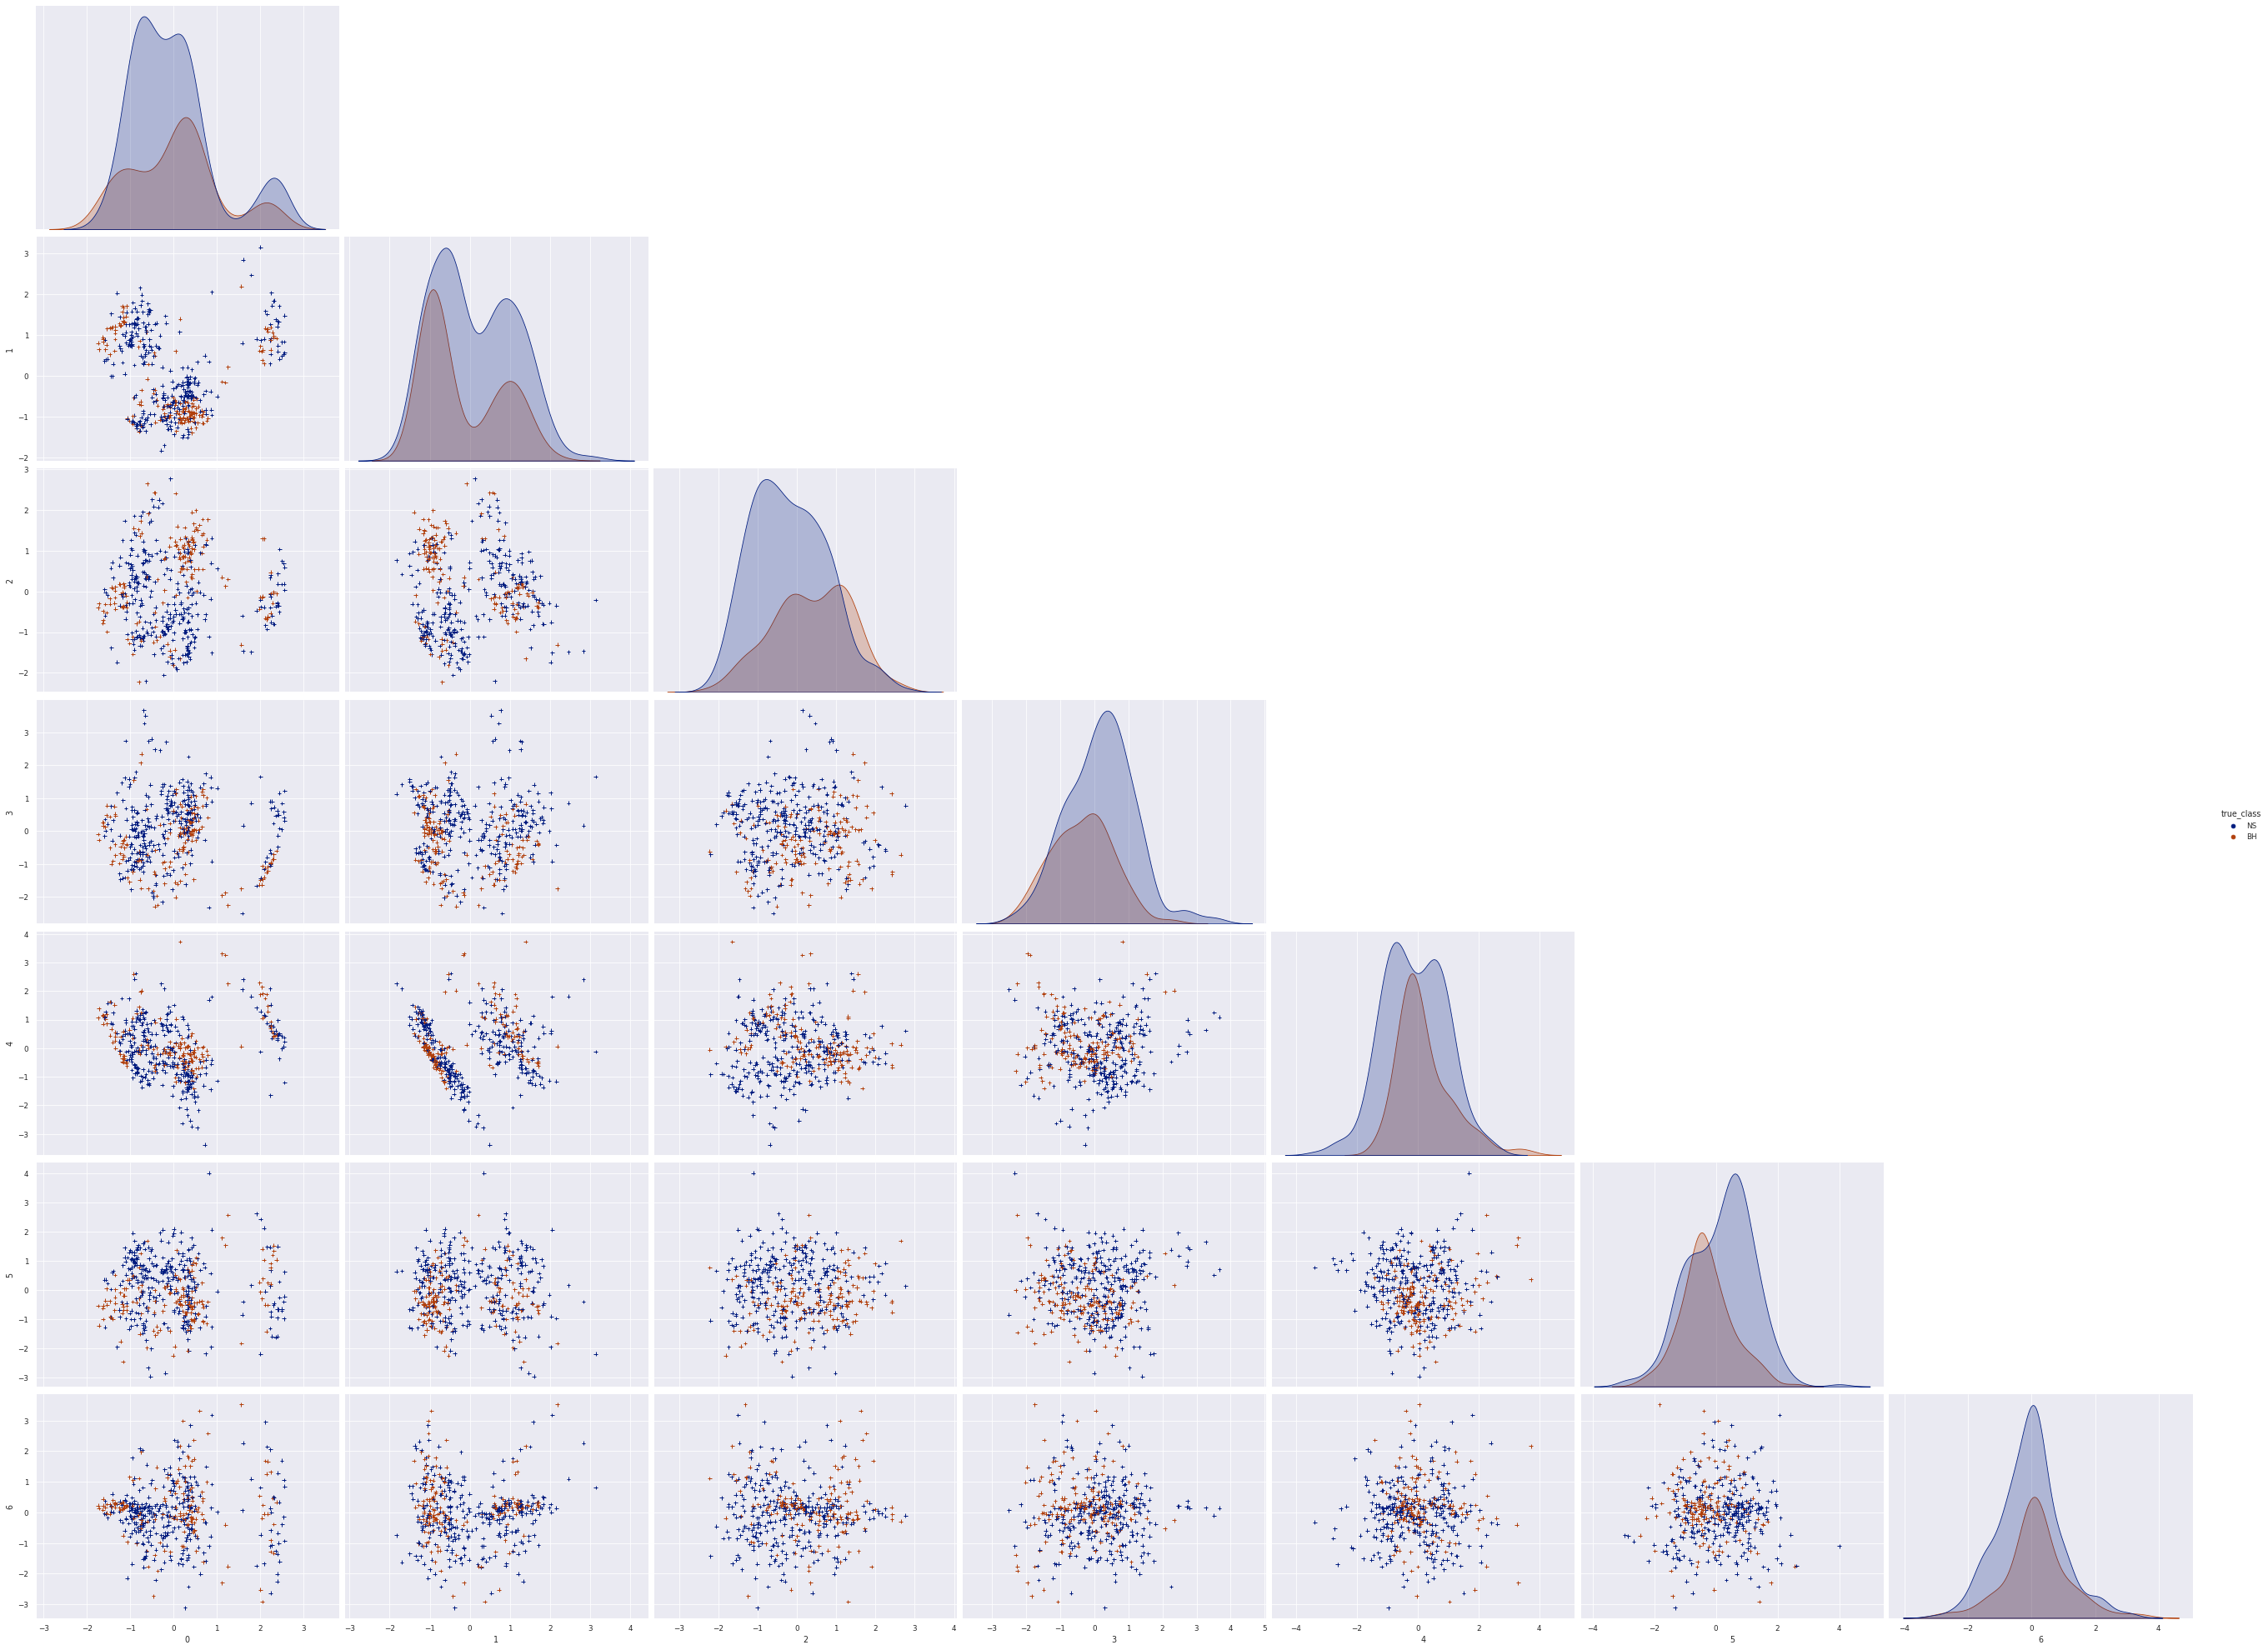

In [39]:
sns.set_style('whitegrid')
sns.set_theme('paper')
sns.set_palette('dark')
plt.style.use('seaborn-dark-palette')
#selectes_src = ['NS0001' , 'NS0078' , 'NS0076' , 'BH0018' , 'BH0019' , 'NS0020']
feat_names = np.arange(red_data.shape[1])
sns.pairplot(
    #data = pca_data[pca_data['src_id'].isin(selectes_src)], 
    data = pca_data ,  
    x_vars=feat_names, 
    y_vars = feat_names , 
    kind='scatter' ,  
    hue='true_class', 
    height=4 , aspect=8/6 , 
    plot_kws=dict(marker="+", linewidth=1),
    palette='dark' , corner=True
)
plt.show()